In [1]:
from sympy import S
from sympy.physics.wigner import clebsch_gordan
import numpy as np

# clebsch_gordan(S(3) / 2, S(1) / 2, 2, S(3) / 2, S(1) / 2, 2)
clebsch_gordan(3 , 1, 2, 3 , 1 , 2)
# Could fill tesor with this
#This just gives coefficets


ModuleNotFoundError: No module named 'sympy'

In [5]:

clebsch_gordan(s_1 , m_1, s_2, m_2, s_3, m_3)

NameError: name 's_1' is not defined

In [18]:
clebsch_gordan(1 , 1,  0.5, 0.5,1.5, 1.5,)

0

In [47]:
def tensor_slice(s1,s3):
    """    m1 = incoming system
    m2 = coupling electron spin
    m3 = coupled system


    :param s1: _description_
    :type s1: _type_
    :param s3: _description_
    :type s3: _type_
    """
    
    s2 = 1/2

    if abs(s1 - s2) != 1/2:
        raise(ValueError('Incompatible Spins'))
    m1_list = np.arange(-s1 , (s1+1), 1)
    m2_list = [-1/2, 1/2]
    m3_list = np.arange(-s3 , (s3+1), 1)
    
    tensor = np.zeros((len(m1_list), len(m2_list),len(m3_list)))

    for i, m1 in enumerate(m1_list):
        for k,m3 in enumerate(m3_list):
            for j,m2 in enumerate(m2_list):
                tensor[i,j,k] = clebsch_gordan(s1 ,s2, s3, m1, m2, m3)

    return tensor
tensor_slice(1,1.5)

array([[[1.        , 0.        , 0.        , 0.        ],
        [0.        , 0.57735027, 0.        , 0.        ]],

       [[0.        , 0.81649658, 0.        , 0.        ],
        [0.        , 0.        , 0.81649658, 0.        ]],

       [[0.        , 0.        , 0.57735027, 0.        ],
        [0.        , 0.        , 0.        , 1.        ]]])

In [50]:
def up_and_down_coupling(s1):
    # Error check for must be half or whole, and zero or above
    if s1 != 0:
        s3_list = [s1-(1/2), s1+(1/2)]
    else:
       s3_list = [s1+(1/2)]

    s1_couplings = [tensor_slice(s1,s3) for s3 in s3_list]
    for i in s1_couplings:
        print(i.shape)
    print(np.concatenate(s1_couplings,axis=2).shape)

up_and_down_coupling(1)

(3, 2, 2)
(3, 2, 4)
(3, 2, 6)


In [46]:
from sympy.physics.quantum.cg import Wigner6j, Wigner3j

w1 = Wigner6j(1, 3 / 2, 1 / 2, 3 / 2, 1 / 2, 1)

w2 = Wigner6j(1, 3 / 2, 3 / 2, 1 / 2, 3 / 2, 1/2)

print(w1)


Wigner6j(1, 1.5, 0.5, 1.5, 0.5, 1)


In [ ]:
Wigner3j()

In [3]:
from sympy.physics.quantum.cg import CG

x = CG(1, 3 / 2, 1 / 2, 3 / 2, 1 / 2, 1)

In [4]:
from guga_graph import ShavittGraph

Tensor(shape=(4, 4, 4, 4), inds=('1_4', '1_3', '1_2', '1bra'), tags=oset(['U6', 'J1bra', 'BRA', 'UIRREP1']), backend='numpy', dtype='float64')
Tensor(shape=(4, 4, 4, 4, 4), inds=('2_7', '2_6', '2_5', '1_2', '2bra'), tags=oset(['UIRREP1', 'BRA', 'J2bra', 'U5']), backend='numpy', dtype='float64')
Tensor(shape=(4, 4, 4, 4, 4, 4), inds=('3_9', '3_8', '3_7', '3_6', '1_3', '3bra'), tags=oset(['UIRREP2', 'J3bra', 'BRA', 'U5']), backend='numpy', dtype='float64')
Tensor(shape=(4, 4, 4, 4, 4), inds=('4_10', '4_9', '4_7', '1_4', '4bra'), tags=oset(['UIRREP3', 'BRA', 'J4bra', 'U5']), backend='numpy', dtype='float64')
Tensor(shape=(4, 4, 4, 4, 4), inds=('5_13', '5_12', '5_11', '2_5', '5bra'), tags=oset(['J5bra', 'U4', 'BRA', 'UIRREP1']), backend='numpy', dtype='float64')
Tensor(shape=(4, 4, 4, 4, 4, 4, 4), inds=('6_15', '6_14', '6_13', '6_12', '2_6', '3_6', '6bra'), tags=oset(['UIRREP2', 'U4', 'J6bra', 'BRA']), backend='numpy', dtype='float64')
Tensor(shape=(4, 4, 4, 4, 4, 4, 4), inds=('7_16', '7_1

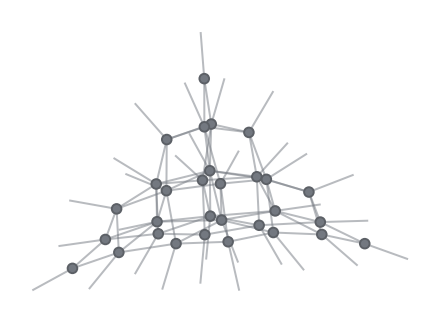

In [12]:
abc = (3, 0, 3)
guga = ShavittGraph(abc)
tn_operator = guga.tensor_network_state(type='bra')
tn_operator.graph()

In [15]:
guga.distinct_row_table

a  b  c  u  uirrep    k0    k1    k2    k3    l0    l1    l2    l3
j                                                                     
1   3  0  3  6       1     2  None     3     4  None  None  None  None
2   3  0  2  5       1     5  None     6     7     1  None  None  None
3   2  1  2  5       2     6     7     8     9  None  None     1  None
4   2  0  3  5       3     7  None     9    10  None  None  None     1
5   3  0  1  4       1    11  None    12    13     2  None  None  None
6   2  1  1  4       2    12    13    14    15     3  None     2  None
7   2  0  2  4       3    13  None    15    16     4     3  None     2
8   1  2  1  4       4    14    15    17    18  None  None     3  None
9   1  1  2  4       5    15    16    18    19  None  None     4     3
10  1  0  3  4       6    16  None    19    20  None  None  None     4
11  3  0  0  3       1  None  None  None    21     5  None  None  None
12  2  1  0  3       2  None    21  None    22     6  None     5  None
13  2  0  1  3       3    21  None    22    23     7     6  None     5
14  1  2  0  3       4  None    22  None    24     8  None     6  None
15  1  1  1  3       5    22    23    24    25     9     8     7     6
16  1  0  2  3       6    23  None    25    26    10     9  None     7
17  0  3  0  3       7  None    24  None  None  None  None     8  None
18  0  2  1  3       8    24    25  None  None  None  None     9     8
19  0  1  2  3       9    25    26  None  None  None  None    10     9
20  0  0  3  3      10    26  None  None  None  None  None  None    10
21  2  0  0  2       1  None  None  None    27    13    12  None    11
22  1  1  0  2       2  None    27  None    28    15    14    13    12
23  1  0  1  2       3    27  None    28    29    16    15  None    13
24  0  2  0  2       4  None    28  None  None    18    17    15    14
25  0  1  1  2       5    28    29  None  None    19    18    16    15
26  0  0  2  2       6    29  None  None  None    20    19  None    16
27  1  0  0  1       1  None  None  None    30    23    22  None    21
28  0  1  0  1       2  None    30  None  None    25    24    23    22
29  0  0  1  1       3    30  None  None  None    26    25  None    23
30  0  0  0  0       1  None  None  None  None    29    28  None    27

In [7]:
# for t in tn_operator.

In [8]:
import quimb as qu
import quimb.tensor as qtn

data = qu.bell_state('psi-').reshape(2, 2)
inds = ('k0', 'k1')
tags = ('KET', )

# data =
ket = qtn.Tensor(data=data, inds=inds, tags=tags)

In [9]:
print(ket)

Tensor(shape=(2, 2), inds=('k0', 'k1'), tags=oset(['KET']), backend='numpy', dtype='complex128')


In [10]:
def single_qubit_layer(circ, gate_round=None):
    """Apply a parametrizable layer of single qubit ``U3`` gates.
    """
    for i in range(circ.N):
        # initialize with random parameters
        params = qu.randn(3, dist='uniform')
        circ.apply_gate('U3',
                        *params,
                        i,
                        gate_round=gate_round,
                        parametrize=True)


def two_qubit_layer(circ, gate2='CZ', reverse=False, gate_round=None):
    """Apply a layer of constant entangling gates.
    """
    regs = range(0, circ.N - 1)
    if reverse:
        regs = reversed(regs)

    for i in regs:
        circ.apply_gate(gate2, i, i + 1, gate_round=gate_round)


def ansatz_circuit(n, depth, gate2='CZ', **kwargs):
    """Construct a circuit of single qubit and entangling layers.
    """
    circ = qtn.Circuit(n, **kwargs)

    for r in range(depth):
        # single qubit gate layer
        single_qubit_layer(circ, gate_round=r)

        # alternate between forward and backward CZ layers
        two_qubit_layer(circ, gate2=gate2, gate_round=r, reverse=r % 2 == 0)

    # add a final single qubit layer
    single_qubit_layer(circ, gate_round=r + 1)

    return circ

In [22]:
n = 6
depth = 9
gate2 = 'CZ'

circ = ansatz_circuit(n, depth, gate2=gate2)


In [14]:
from autoray import do

# Need to figure out how to build the GUGA tensors like this.
def a_gate(params):
    phi,psi = params
    c = do('cos', phi / 2)
    s = do('sin', phi / 2)
    e = do('exp', 1j*psi )
    data = [[1,0,0,0],[0,c, -s,0], [0,s, c,0],[0,0,0,e]]
    return do('array', data, like=params)

qtn.PTensor(a_gate, [0,3.14], inds=(4, 4)).data


array([[ 1.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  1.        +0.j        ,
        -0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         1.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , -0.99999873+0.00159265j]])

In [24]:
def guga_param_tens_gen_singles(params):
    phi_0,phi_1 = params
    c_0 = do('cos', phi_0 / 2)
    s_0 = do('sin', phi_0 / 2)
    c_1 = do('cos', phi_1 / 2)
    s_1 = do('sin', phi_1 / 2)
    data = [[[c_0, -s_0], [s_0, c_0]],
    [[c_1, -s_1], [s_1, c_1]]]
    return do('array', data, like=params)


import numpy

qtn.PTensor(guga_param_tens_gen_singles, [0,3.14], inds=(2, 2, 2)).data


array([[[ 1.00000000e+00, -0.00000000e+00],
        [ 0.00000000e+00,  1.00000000e+00]],

       [[ 7.96326711e-04, -9.99999683e-01],
        [ 9.99999683e-01,  7.96326711e-04]]])

In [25]:
def loss(psi_bra, h):
    psi_ket = psi_bra.transpose
    return (psi_bra & h & psi_ket).contract(all, optimize='auto-hq')


In [26]:
import numpy
qtn.PTensor(a_gate, [0.7,2], inds=(4, 4)).data
# Weird initial conditions need to be applied.

array([[ 1.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.93937271+0.j        ,
        -0.34289781+0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.34289781+0.j        ,
         0.93937271+0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , -0.41614684+0.90929743j]])

In [27]:
# Figure this out for our case getting closer
tnopt = qtn.TNOptimizer(
    V,  # the tensor network we want to optimize
    loss,  # the function we want to minimize
    loss_constants={'U': U},  # supply U to the loss function as a constant TN
    tags=['U3'],  # only optimize U3 tensors
    autodiff_backend='jax',  # use 'autograd' for non-compiled optimization
    optimizer='L-BFGS-B',  # the optimization algorithm
)

NameError: name 'V' is not defined

In [28]:
l = qtn.COPY_tensor(5, ['l0', 'l1', 'l2', 'l3', 'l'])
k = qtn.COPY_tensor(5, ['k0', 'k1', 'k2', 'k3', 'k'])


In [29]:
def a_gate(params):
    def matrix_slice(data):
        c = do('cos', data[0] / 2)
        s = do('sin', data[0] / 2)
        e = do('exp', 1j*data[1])
        d = [[1, 0, 0, 0], [0, c, -s, 0], [0, s, c, 0], [0, 0, 0, e]]
        return d

    data = [matrix_slice(i) for i in params]
    return do('array', data, like=params)

angles = [[0.2,4.3],[0.6,0.1],[0.2,1.2],[7.1,5.3]]
d = qtn.PTensor(a_gate, angles, inds=['l','k','d'])


In [30]:
t = l & d & k

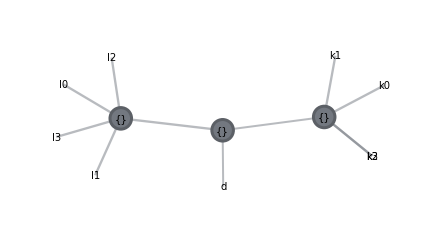

In [31]:
t.graph()

(4,)
(4, 4, 4, 4)
angles [(0, 0), (0, 0), (0, 0), (0, 0)]
(4, 4)
(4, 4, 4, 4)
angles [(0, 0), (0, 0), (0, 0), (0, 0)]
(4, 4)
(4, 4, 4, 4, 4)
angles [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
(4, 4)
(4, 4, 4, 4)
angles [(0, 0), (0, 0), (0, 0), (0, 0)]
(4, 4)
(4, 4, 4, 4)
angles [(0, 0), (0, 0), (0, 0), (0, 0)]
(4, 4, 4)
(4, 4, 4, 4, 4)
angles [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
(4, 4, 4, 4)
(4, 4, 4, 4)
angles [(0, 0), (0, 0), (0, 0), (0, 0)]
(4, 4)
(4, 4, 4, 4, 4)
angles [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
(4, 4, 4)
(4, 4, 4, 4, 4)
angles [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
(4, 4)
(4, 4, 4, 4)
angles [(0, 0), (0, 0), (0, 0), (0, 0)]
(4, 4)
(4, 4)
angles [(0, 0), (0, 0)]
(4, 4, 4)
(4, 4, 4)
angles [(0, 0), (0, 0), (0, 0)]
(4, 4, 4, 4)
(4, 4, 4, 4)
angles [(0, 0), (0, 0), (0, 0), (0, 0)]
(4, 4, 4)
(4, 4, 4)
angles [(0, 0), (0, 0), (0, 0)]
(4, 4, 4, 4, 4)
(4, 4, 4, 4, 4)
angles [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
(4, 4, 4, 4)
(4, 4, 4, 4)
angles [(0, 0), (0, 0), (0, 0), 

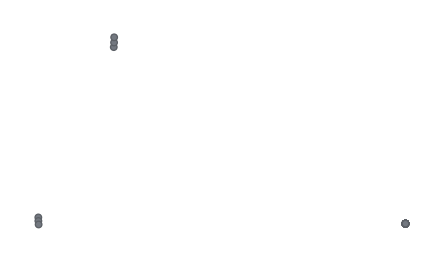

In [32]:
from guga_graph import ShavittGraph

abc = (3, 0, 3)
guga = ShavittGraph(abc)
ptensor_state = guga.ptensor_network_state()
ptensor_state.graph()